###Read file with scored words

In [1]:
project_path = '/Users/lgaza/Dropbox/ZaMSZ/SentimentAnalysis'

In [2]:
import sys
sys.path.insert(1, project_path)

In [3]:
input_file_path = '{}/data/labMT.csv'.format(project_path)


In [4]:
from input import words
from input import gutenberg_input, file_input
from analysis import slice_generator
from analysis.distance import distance_analysis
from analysis.sentence import sentence_analysis
from analysis.slice import slice_analysis
from analysis.book import book_analysis

In [5]:
scored_input_words_df = words.ScoredInputWords(input_file_path)

In [69]:
books = {
    'john_milton_paradise_lost': gutenberg_input.GutenbergInput('milton-paradise.txt', 'john_milton', 'paradise_lost'),
    'herman_melville_moby_dick': gutenberg_input.GutenbergInput('melville-moby_dick.txt', 'herman_melville', 'moby_dick'),
    'william_shakespeare_macbeth': gutenberg_input.GutenbergInput('shakespeare-macbeth.txt', 'william_shakespeare', 'macbeth'),
    'james_joyce_ulysses': file_input.FileInput('{}/data/books/4300-0.txt'.format(project_path), 'james_joyce', 'ulysses'),
    'murray_leinster_the_world_is_taboo': file_input.FileInput('{}/data/books/pg18172.txt'.format(project_path), 'murray_leinster', 'this_world_is_taboo'),
    'dave_eggers_a_heartbreaking_work_of_staggering_genius': file_input.FileInput('{}/data/books/AHeartbreakingWorkOfStaggeringGenius_DEggers/a_heartbreaking_work_of_staggering_genius.txt'.format(project_path), 'dave_eggers', 'a_heartbreaking_work_of_staggering_genius'),
    'toni_morrison_beloved': file_input.FileInput('{}/data/books/Beloved_TMorrisson/t.morrison_-_beloved.txt'.format(project_path), 'toni_morrison', 'beloved'),
    'joseph_heller_catch_22': file_input.FileInput('{}/data/books/Catch22_JHeller/catch_22.txt'.format(project_path), 'joseph_heller', 'catch_22'),
    'margaret_mitchell_gone_with_the_wind': file_input.FileInput('{}/data/books/GoneWithTheWind/GoneWithTheWind.txt'.format(project_path), 'margaret_mitchell', 'gone_with_the_wind'),
    'jane_austen_pride_and_prejudice': file_input.FileInput('{}/data/books/PrideAndPrejudice/pride.txt'.format(project_path), 'jane_austen', 'pride_and_prejudice'),
    'daniel_defoe_robinson_cruzoe': file_input.FileInput('{}/data/books/RobinsonCruzoe/robinson.txt'.format(project_path), 'daniel_defoe', 'robinson_cruzoe'),
    'virginia_woolf_the_voyage_out': file_input.FileInput('{}/data/books/The_voyage_VirginiaWoolf/v.woolf_-_the_voyage_out.txt'.format(project_path), 'virginia_woolf', 'the_voyage_out'),
    'virginia_woolf_the_years': file_input.FileInput('{}/data/books/The_years_VirginiaWoolf/v.woolf_-_the_years.txt'.format(project_path), 'virginia_woolf', 'the_years'),
    'arthur_conan_doyle_the_adventures_of_sherlock_holmes': file_input.FileInput('{}/data/books/TheAdventuresOdSherlockHolmes/TheAdventuresOfSherlockHolmes.txt'.format(project_path), 'arthur_conan_doyle', 'the_adventures_of_sherlock_holmes'),
    'henry_james_the_ambassadors': file_input.FileInput('{}/data/books/TheAmbassadors/TheAmbassadors.txt'.format(project_path), 'henry_james', 'the_ambassadors'),
    'virginia_woolf_the_waves': file_input.FileInput('{}/data/books/Waves_VirginiaWoolf/waves_tekst.txt'.format(project_path), 'virginia_woolf', 'the_waves'),
    'william_shakespear_the_winters_tale': file_input.FileInput('{}/data/books/pg2248.txt'.format(project_path), 'william_shakespear', 'the_winters_tale'),
    'james_joyce_finnegans_wake': file_input.FileInput('{}/data/books/j.joyce_-_finnegans_wake.txt'.format(project_path), 'james_joyce', 'finnegans_wake'),
    'marcel_proust_swanns_way': file_input.FileInput('{}/data/books/0300511.txt'.format(project_path), 'marcel_proust', 'swanns_way'),
    'marcel_proust_within_a_budding_grove': file_input.FileInput('{}/data/books/0300401.txt'.format(project_path), 'marcel_proust', 'within_a_budding_grove'),
    'marcel_proust_the_guermantes_way': file_input.FileInput('{}/data/books/0300411.txt'.format(project_path), 'marcel_proust', 'the_guermantes_way'),
    'marcel_proust_cities_of_the_plain': file_input.FileInput('{}/data/books/0300491.txt'.format(project_path), 'marcel_proust', 'cities_of_the_plain'),
    'marcel_proust_the_captive': file_input.FileInput('{}/data/books/0300501.txt'.format(project_path), 'marcel_proust', 'the_captive'),
    'marcel_proust_the_sweet_cheat_gone': file_input.FileInput('{}/data/books/0300541.txt'.format(project_path), 'marcel_proust', 'the_sweet_cheat_gone'),
    'marcel_proust_time_regained': file_input.FileInput('{}/data/books/0300691.txt'.format(project_path), 'marcel_proust', 'time_regained'),
    'jane_austen_sense_and_sensibility': file_input.FileInput('{}/data/books/pg161.txt'.format(project_path), 'jane_austen', 'sense_and_sensibility'),
    'the_king_james_version_of_the_bible': file_input.FileInput('{}/data/books/pg10.txt'.format(project_path), '', 'the_king_james_version_of_the_bible'),
    'j_r_r_tolkien_the_fellowship_of_the_ring': file_input.FileInput('{}/data/books/the_fellowship_of_the_ring.txt'.format(project_path), 'j_r_r_tolkien', 'the_fellowship_of_the_ring'),
    'j_r_r_tolkien_the_two_towers': file_input.FileInput('{}/data/books/the_two_towers.txt'.format(project_path), 'j_r_r_tolkien', 'the_two_towers'),
    'j_r_r_tolkien_the_return_of_the_king': file_input.FileInput('{}/data/books/the_return_of_the_king.txt'.format(project_path), 'j_r_r_tolkien', 'the_return_of_the_king'),
    'charles_dickens_oliver_twist': file_input.FileInput('{}/data/books/pg730.txt'.format(project_path), 'charles_dickens', 'oliver_twist')
}

In [70]:
crime_books = {
    'e_w_hornung_a_thief_in_the_night_a_book_of_raffles_adventures': file_input.FileInput('{}/data/books/crime_fiction/e_w_hornung-a_thief_in_the_night_a_book_of_raffles_adventures.txt'.format(project_path), 'e_w_hornung', 'a_thief_in_the_night_a_book_of_raffles_adventures'),
    'e_w_hornung_dead_men_tell_no_tales': file_input.FileInput('{}/data/books/crime_fiction/e_w_hornung-dead_men_tell_no_tales.txt'.format(project_path), 'e_w_hornung', 'dead_men_tell_no_tales'),
    'e_w_hornung_mr_justice_raffles': file_input.FileInput('{}/data/books/crime_fiction/e_w_hornung-mr_justice_raffles.txt'.format(project_path), 'e_w_hornung', 'mr_justice_raffles'),
    'e_w_hornung_no_hero': file_input.FileInput('{}/data/books/crime_fiction/e_w_hornung-no_hero.txt'.format(project_path), 'e_w_hornung', 'no_hero'),
    'e_w_hornung_raffles_further_adventures_of_the_amateur_cracksman': file_input.FileInput('{}/data/books/crime_fiction/e_w_hornung-raffles_further_adventures_of_the_amateur_cracksman.txt'.format(project_path), 'e_w_hornung', 'raffles_further_adventures_of_the_amateur_cracksman'),
    'e_w_hornung_the_amateur_cracksman': file_input.FileInput('{}/data/books/crime_fiction/e_w_hornung-the_amateur_cracksman.txt'.format(project_path), 'e_w_hornung', 'the_amateur_cracksman'),
    'e_w_hornung_the_shadow_of_the_rope': file_input.FileInput('{}/data/books/crime_fiction/e_w_hornung-the_shadow_of_the_rope.txt'.format(project_path), 'e_w_hornung', 'the_shadow_of_the_rope'),
    'fyodor_dostoyevsky_crime_and_punishment': file_input.FileInput('{}/data/books/crime_fiction/fyodor_dostoyevsky-crime_and_punishment.txt'.format(project_path), 'fyodor_dostoyevsky', 'crime_and_punishment'),
    'grant_allen_an_african_millionaire': file_input.FileInput('{}/data/books/crime_fiction/grant_allen-an_african_millionaire.txt'.format(project_path), 'grant_allen', 'an_african_millionaire'),
    'h_beam_piper_murder_in_the_gunroom': file_input.FileInput('{}/data/books/crime_fiction/h_beam_piper-murder_in_the_gunroom.txt'.format(project_path), 'h_beam_piper', 'murder_in_the_gunroom'),
    'maurice_leblanc_arsene_lupin': file_input.FileInput('{}/data/books/crime_fiction/maurice_leblanc-arsene_lupin.txt'.format(project_path), 'maurice_leblanc', 'arsene_lupin'),
    'maurice_leblanc_the_crystal_stopper': file_input.FileInput('{}/data/books/crime_fiction/maurice_leblanc-the_crystal_stopper.txt'.format(project_path), 'maurice_leblanc', 'the_crystal_stopper'),
    'maurice_leblanc_the_eight_strokes_of_the_clock': file_input.FileInput('{}/data/books/crime_fiction/maurice_leblanc-the_eight_strokes_of_the_clock.txt'.format(project_path), 'maurice_leblanc', 'the_eight_strokes_of_the_clock'),
    'maurice_leblanc_the_extraordinary_adventures_of_arsene_lupin_gentleman_burglar': file_input.FileInput('{}/data/books/crime_fiction/maurice_leblanc-the_extraordinary_adventures_of_arsene_lupin_gentleman_burglar.txt'.format(project_path), 'maurice_leblanc', 'the_extraordinary_adventures_of_arsene_lupin_gentleman_burglar'),
    'maurice_leblanc_the_hollow_needle_further_adventures_of_arsene_lupin': file_input.FileInput('{}/data/books/crime_fiction/maurice_leblanc-the_hollow_needle_further_adventures_of_arsene_lupin.txt'.format(project_path), 'maurice_leblanc', 'the_hollow_needle_further_adventures_of_arsene_lupin'),
    'maurice_leblanc_the_teeth_of_the_tiger': file_input.FileInput('{}/data/books/crime_fiction/maurice_leblanc-the_teeth_of_the_tiger.txt'.format(project_path), 'maurice_leblanc', 'the_teeth_of_the_tiger'),
    'sax_rohmer_bat_wing': file_input.FileInput('{}/data/books/crime_fiction/sax_rohmer-bat_wing.txt'.format(project_path), 'sax_rohmer', 'bat_wing'),
    'sax_rohmer_brood_of_the_witch_queen': file_input.FileInput('{}/data/books/crime_fiction/sax_rohmer-brood_of_the_witch_queen.txt'.format(project_path), 'sax_rohmer', 'brood_of_the_witch_queen'),
    'sax_rohmer_dope': file_input.FileInput('{}/data/books/crime_fiction/sax_rohmer-dope.txt'.format(project_path), 'sax_rohmer', 'dope'),
    'sax_rohmer_fire_tongue': file_input.FileInput('{}/data/books/crime_fiction/sax_rohmer-fire_tongue.txt'.format(project_path), 'sax_rohmer', 'fire_tongue'),
    'sax_rohmer_tales_of_chinatown': file_input.FileInput('{}/data/books/crime_fiction/sax_rohmer-tales_of_chinatown.txt'.format(project_path), 'sax_rohmer', 'tales_of_chinatown'),
    'sax_rohmer_the_devil_doctor': file_input.FileInput('{}/data/books/crime_fiction/sax_rohmer-the_devil_doctor.txt'.format(project_path), 'sax_rohmer', 'the_devil_doctor'),
    'sax_rohmer_the_golden_scorpion': file_input.FileInput('{}/data/books/crime_fiction/sax_rohmer-the_golden_scorpion.txt'.format(project_path), 'sax_rohmer', 'the_golden_scorpion'),
    'sax_rohmer_the_green_eyes_of_bast': file_input.FileInput('{}/data/books/crime_fiction/sax_rohmer-the_green_eyes_of_bast.txt'.format(project_path), 'sax_rohmer', 'the_green_eyes_of_bast'),
    'sax_rohmer_the_hand_of_fu_manchu': file_input.FileInput('{}/data/books/crime_fiction/sax_rohmer-the_hand_of_fu_manchu.txt'.format(project_path), 'sax_rohmer', 'the_hand_of_fu_manchu'),
    'sax_rohmer_the_insidiou_dr_fu-manchu': file_input.FileInput('{}/data/books/crime_fiction/sax_rohmer-the_insidiou_dr_fu-manchu.txt'.format(project_path), 'sax_rohmer', 'the_insidiou_dr_fu-manchu'),
    'sax_rohmer_the_quest_of_the_sacred_slipper': file_input.FileInput('{}/data/books/crime_fiction/sax_rohmer-the_quest_of_the_sacred_slipper.txt'.format(project_path), 'sax_rohmer', 'the_quest_of_the_sacred_slipper'),
    'sax_rohmer_the_return_of_dr_fu_manchu': file_input.FileInput('{}/data/books/crime_fiction/sax_rohmer-the_return_of_dr_fu_manchu.txt'.format(project_path), 'sax_rohmer', 'the_return_of_dr_fu_manchu'),
    'sax_rohmer_the_yellow_claw': file_input.FileInput('{}/data/books/crime_fiction/sax_rohmer-the_yellow_claw.txt'.format(project_path), 'sax_rohmer', 'the_yellow_claw')
}

In [71]:
children_books = {
    'louisa_may_alcott_aunt_jos_scrap_bag_jimmys_cruise_in_the_pinafore': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-aunt_jos_scrap_bag_jimmys_cruise_in_the_pinafore.txt'.format(project_path), 'louisa_may_alcott', 'aunt_jos_scrap_bag_jimmys_cruise_in_the_pinafore'),
    'louisa_may_alcott_eight_cousins': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-eight_cousins.txt'.format(project_path), 'louisa_may_alcott', 'eight_cousins'),
    'louisa_may_alcott_a_garland_for_girls': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-a_garland_for_girls.txt'.format(project_path), 'louisa_may_alcott', 'a_garland_for_girls'),
    'louisa_may_alcott_flower_fables': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-flower_fables.txt'.format(project_path), 'louisa_may_alcott', 'flower_fables'),
    'louisa_may_alcott_jack_and_jill': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-jack_and_jill.txt'.format(project_path), 'louisa_may_alcott', 'jack_and_jill'),
    'louisa_may_alcott_jos_boys': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-jos_boys.txt'.format(project_path), 'louisa_may_alcott', 'jos_boys'),
    'louisa_may_alcott_kittys_class_day_and_other_stories': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-kittys_class_day_and_other_stories.txt'.format(project_path), 'louisa_may_alcott', 'kittys_class_day_and_other_stories'),
    'louisa_may_alcott_little_men_life_at_plumfield_with_jos_boys': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-little_men_life_at_plumfield_with_jos_boys.txt'.format(project_path), 'louisa_may_alcott', 'little_men_life_at_plumfield_with_jos_boys'),
    'louisa_may_alcott_little_women': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-little_women.txt'.format(project_path), 'louisa_may_alcott', 'little_women'),
    'louisa_may_alcott_the_louisa_alcott_reader_a_supplementary_reader_for_the_fourth_year_of_school': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-the_louisa_alcott_reader_a_supplementary_reader_for_the_fourth_year_of_school.txt'.format(project_path), 'louisa_may_alcott', 'the_louisa_alcott_reader_a_supplementary_reader_for_the_fourth_year_of_school'),
    'louisa_may_alcott_marjories_three_gifts': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-marjories_three_gifts.txt'.format(project_path), 'louisa_may_alcott', 'marjories_three_gifts'),
    'louisa_may_alcott_a_modern_cinderella_or_the_little_old_shoe_and_other_stories': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-a_modern_cinderella_or_the_little_old_shoe_and_other_stories.txt'.format(project_path), 'louisa_may_alcott', 'a_modern_cinderella_or_the_little_old_shoe_and_other_stories'),
    'louisa_may_alcott_the_mysterious_key_and_what_it_opened': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-the_mysterious_key_and_what_it_opened.txt'.format(project_path), 'louisa_may_alcott', 'the_mysterious_key_and_what_it_opened'),
    'louisa_may_alcott_an_old_fashioned_girl': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-an_old_fashioned_girl.txt'.format(project_path), 'louisa_may_alcott', 'an_old_fashioned_girl'),
    'louisa_may_alcott_onder_moeders_vleugels': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-onder_moeders_vleugels.txt'.format(project_path), 'louisa_may_alcott', 'onder_moeders_vleugels'),
    'louisa_may_alcott_rose_in_bloom': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-rose_in_bloom.txt'.format(project_path), 'louisa_may_alcott', 'rose_in_bloom'),
    'louisa_may_alcott_aunt_jos_scrap_bag_volume_2': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-aunt_jos_scrap_bag_volume_2.txt'.format(project_path), 'louisa_may_alcott', 'aunt_jos_scrap_bag_volume_2'),
    'louisa_may_alcott_funder_the_lilacs': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-under_the_lilacs.txt'.format(project_path), 'louisa_may_alcott', 'under_the_lilacs'),
    'j_m_barrie_peter_pan': file_input.FileInput('{}/data/books/children_literature/j_m_barrie-peter_pan.txt'.format(project_path), 'j_m_barrie', 'peter_pan'),
    'l_frank_baum_american_fairy_tales': file_input.FileInput('{}/data/books/children_literature/l_frank_baum-american_fairy_tales.txt'.format(project_path), 'l_frank_baum', 'american_fairy_tales'),
    'l_frank_baum_dorothy_and_the_wizard_in_oz': file_input.FileInput('{}/data/books/children_literature/l_frank_baum-dorothy_and_the_wizard_in_oz.txt'.format(project_path), 'l_frank_baum', 'dorothy_and_the_wizard_in_oz'),
    'l_frank_baum_the_emerald_city_of_oz': file_input.FileInput('{}/data/books/children_literature/l_frank_baum-the_emerald_city_of_oz.txt'.format(project_path), 'l_frank_baum', 'the_emerald_city_of_oz'),
    'l_frank_baum_the_enchanted_island_of_yew': file_input.FileInput('{}/data/books/children_literature/l_frank_baum-the_enchanted_island_of_yew.txt'.format(project_path), 'l_frank_baum', 'the_enchanted_island_of_yew'),
    'l_frank_baum_glinda_of_oz': file_input.FileInput('{}/data/books/children_literature/l_frank_baum-glinda_of_oz.txt'.format(project_path), 'l_frank_baum', 'glinda_of_oz'),
    'l_frank_baum_a_kidnapped_santa_claus': file_input.FileInput('{}/data/books/children_literature/l_frank_baum-a_kidnapped_santa_claus.txt'.format(project_path), 'l_frank_baum', 'a_kidnapped_santa_claus'),
    'frances_hodgson_burnett_little_lord_fauntleroy': file_input.FileInput('{}/data/books/children_literature/frances_hodgson_burnett-little_lord_fauntleroy.txt'.format(project_path), 'frances_hodgson_burnett', 'little_lord_fauntleroy'),
    'frances_hodgson_burnett_a_little_princess': file_input.FileInput('{}/data/books/children_literature/frances_hodgson_burnett-a_little_princess.txt'.format(project_path), 'frances_hodgson_burnett', 'a_little_princess'),
    'frances_hodgson_burnett_the_lost_prince': file_input.FileInput('{}/data/books/children_literature/frances_hodgson_burnett-the_lost_prince.txt'.format(project_path), 'frances_hodgson_burnett', 'the_lost_prince'),
    'frances_hodgson_burnett_the_secret_garden': file_input.FileInput('{}/data/books/children_literature/frances_hodgson_burnett-the_secret_garden.txt'.format(project_path), 'frances_hodgson_burnett', 'the_secret_garden'),
    'susan_coolidge_what_katy_did_next': file_input.FileInput('{}/data/books/children_literature/susan_coolidge-what_katy_did_next.txt'.format(project_path), 'susan_coolidge', 'what_katy_did_next'),
    'susan_coolidge_what_katy_did_at_school': file_input.FileInput('{}/data/books/children_literature/susan_coolidge-what_katy_did_at_school.txt'.format(project_path), 'susan_coolidge', 'what_katy_did_at_school'),
    'susan_coolidge_clover': file_input.FileInput('{}/data/books/children_literature/susan_coolidge-clover.txt'.format(project_path), 'susan_coolidge', 'clover'),
    'juliana_horatia_gatty_ewing_a_flat_iron_for_a_farthing_or_some_passages_in_the_life_of_an_only_son': file_input.FileInput('{}/data/books/children_literature/juliana_horatia_gatty_ewing-a_flat_iron_for_a_farthing_or_some_passages_in_the_life_of_an_only_son.txt'.format(project_path), 'juliana_horatia_gatty_ewing', 'a_flat_iron_for_a_farthing_or_some_passages_in_the_life_of_an_only_son'),
    'juliana_horatia_gatty_ewing_a_great_emergency_and_other_tales': file_input.FileInput('{}/data/books/children_literature/juliana_horatia_gatty_ewing-a_great_emergency_and_other_tales.txt'.format(project_path), 'juliana_horatia_gatty_ewing', 'a_great_emergency_and_other_tales'),
    'juliana_horatia_gatty_jan_of_the_windmill_a_story_of_the_plains': file_input.FileInput('{}/data/books/children_literature/juliana_horatia_gatty-jan_of_the_windmill_a_story_of_the_plains.txt'.format(project_path), 'juliana_horatia_gatty_ewing', 'jan_of_the_windmill_a_story_of_the_plains'),
    'juliana_horatia_gatty_ewing_melchiors_dream_and_other_tales': file_input.FileInput('{}/data/books/children_literature/juliana_horatia_gatty_ewing-melchiors_dream_and_other_tales.txt'.format(project_path), 'juliana_horatia_gatty_ewing', 'melchiors_dream_and_other_tales'),
    'juliana_horatia_gatty_ewing_mrs_overtheways_remembrances': file_input.FileInput('{}/data/books/children_literature/juliana_horatia_gatty_ewing-mrs_overtheways_remembrances.txt'.format(project_path), 'juliana_horatia_gatty_ewing', 'mrs_overtheways_remembrances'),
    'juliana_horatia_gatty_ewing_six_to_sixteen_a_story_for_girls': file_input.FileInput('{}/data/books/children_literature/juliana_horatia_gatty_ewing-six_to_sixteen_a_story_for_girls.txt'.format(project_path), 'juliana_horatia_gatty_ewing', 'six_to_sixteen_a_story_for_girls'),
    'juliana_horatia_gatty_ewing_we_and_the_world_a_book_for_boys_part_II': file_input.FileInput('{}/data/books/children_literature/juliana_horatia_gatty_ewing-we_and_the_world_a_book_for_boys_part_II.txt'.format(project_path), 'juliana_horatia_gatty_ewing', 'we_and_the_world_a_book_for_boys_part_II'),
    'kenneth_grahame_the_wind_in_the_willows': file_input.FileInput('{}/data/books/children_literature/kenneth_grahame-the_wind_in_the_willows.txt'.format(project_path), 'kenneth_grahame', 'the_wind_in_the_willows'),
    'joel_chandler_harris_nights_with_uncle_remus': file_input.FileInput('{}/data/books/children_literature/joel_chandler_harris-nights_with_uncle_remus.txt'.format(project_path), 'joel_chandler_harris', 'nights_with_uncle_remus'),
    'nathaniel_hawthorne_twice_told_tales': file_input.FileInput('{}/data/books/children_literature/nathaniel_hawthorne-twice_told_tales.txt'.format(project_path), 'nathaniel_hawthorne', 'twice_told_tales'),
    'nathaniel_hawthorne_tanglewood_tales': file_input.FileInput('{}/data/books/children_literature/nathaniel_hawthorne-tanglewood_tales.txt'.format(project_path), 'nathaniel_hawthorne', 'tanglewood_tales'),
    'charles_kingsley_the_water_babies_a_fairy_tale_for_a_land_baby': file_input.FileInput('{}/data/books/children_literature/charles_kingsley-the_water_babies_a_fairy_tale_for_a_land_baby.txt'.format(project_path), 'charles_kingsley', 'the_water_babies_a_fairy_tale_for_a_land_baby'),
    'rudyard_kipling_the_second_jungle_book': file_input.FileInput('{}/data/books/children_literature/rudyard_kipling-the_second_jungle_book.txt'.format(project_path), 'rudyard_kipling', 'the_second_jungle_book'),
    'rudyard_kipling_puck_of_pooks_hill': file_input.FileInput('{}/data/books/children_literature/rudyard_kipling-puck_of_pooks_hill.txt'.format(project_path), 'rudyard_kipling', 'puck_of_pooks_hill'),
    'rudyard_kipling_kim': file_input.FileInput('{}/data/books/children_literature/rudyard_kipling-kim.txt'.format(project_path), 'rudyard_kipling', 'kim'),
    'hugh_lofting_the_voyages_of_doctor_dolittle': file_input.FileInput('{}/data/books/children_literature/hugh_lofting-the_voyages_of_doctor_dolittle.txt'.format(project_path), 'hugh_lofting', 'the_voyages_of_doctor_dolittle'),
    'george_macdonald_at_the_back_of_the_north_wind': file_input.FileInput('{}/data/books/children_literature/george_macdonald-at_the_back_of_the_north_wind.txt'.format(project_path), 'george_macdonald', 'at_the_back_of_the_north_wind'),
    'george_macdonald_the_princess_and_curdie': file_input.FileInput('{}/data/books/children_literature/george_macdonald-the_princess_and_curdie.txt'.format(project_path), 'george_macdonald', 'the_princess_and_curdie'),
    'frederick_marryat_the_children_of_the_new_forest': file_input.FileInput('{}/data/books/children_literature/frederick_marryat-the_children_of_the_new_forest.txt'.format(project_path), 'frederick_marryat', 'the_children_of_the_new_forest'),
    'l_m_montgomery_anne_of_avonlea': file_input.FileInput('{}/data/books/children_literature/l_m_montgomery-anne_of_avonlea.txt'.format(project_path), 'l_m_montgomery', 'anne_of_avonlea'),
    'l_m_montgomery_anne_of_green_gables': file_input.FileInput('{}/data/books/children_literature/l_m_montgomery-anne_of_green_gables.txt'.format(project_path), 'l_m_montgomery', 'anne_of_green_gables'),
    'l_m_montgomery_anne_of_the_island': file_input.FileInput('{}/data/books/children_literature/l_m_montgomery-anne_of_the_island.txt'.format(project_path), 'l_m_montgomery', 'anne_of_the_island'),
    'l_m_montgomery_annes_house_of_dreams': file_input.FileInput('{}/data/books/children_literature/l_m_montgomery-annes_house_of_dreams.txt'.format(project_path), 'l_m_montgomery', 'annes_house_of_dreams'),
    'l_m_montgomery_chronicles_of_avonlea': file_input.FileInput('{}/data/books/children_literature/l_m_montgomery-chronicles_of_avonlea.txt'.format(project_path), 'l_m_montgomery', 'chronicles_of_avonlea'),
    'l_m_montgomery_further_chronicles_of_avonlea': file_input.FileInput('{}/data/books/children_literature/l_m_montgomery-further_chronicles_of_avonlea.txt'.format(project_path), 'l_m_montgomery', 'further_chronicles_of_avonlea'),
    'l_m_montgomery_the_golden_road': file_input.FileInput('{}/data/books/children_literature/l_m_montgomery-the_golden_road.txt'.format(project_path), 'l_m_montgomery', 'the_golden_road'),
    'l_m_montgomery_rainbow_valley': file_input.FileInput('{}/data/books/children_literature/l_m_montgomery-rainbow_valley.txt'.format(project_path), 'l_m_montgomery', 'rainbow_valley'),
    'l_m_montgomery_rilla_of_ingleside': file_input.FileInput('{}/data/books/children_literature/l_m_montgomery-rilla_of_ingleside.txt'.format(project_path), 'l_m_montgomery', 'rilla_of_ingleside'),
    'l_m_montgomery_the_story_girl': file_input.FileInput('{}/data/books/children_literature/l_m_montgomery-the_story_girl.txt'.format(project_path), 'l_m_montgomery', 'the_story_girl'),
    'e_nesbit_the_enchanted_castle': file_input.FileInput('{}/data/books/children_literature/e_nesbit-the_enchanted_castle.txt'.format(project_path), 'e_nesbit', 'the_enchanted_castle'),
    'e_nesbit_five_children_and_it': file_input.FileInput('{}/data/books/children_literature/e_nesbit-five_children_and_it.txt'.format(project_path), 'e_nesbit', 'five_children_and_it'),
    'e_nesbit_the_magic_city': file_input.FileInput('{}/data/books/children_literature/e_nesbit-the_magic_city.txt'.format(project_path), 'e_nesbit', 'the_magic_city'),
    'e_nesbit_the_phoenix_and_the_carpet': file_input.FileInput('{}/data/books/children_literature/e_nesbit-the_phoenix_and_the_carpet.txt'.format(project_path), 'e_nesbit', 'the_phoenix_and_the_carpet'),
    'e_nesbit_the_railway_children': file_input.FileInput('{}/data/books/children_literature/e_nesbit-the_railway_children.txt'.format(project_path), 'e_nesbit', 'the_railway_children'),
    'e_nesbit_the_story_of_the_amulet': file_input.FileInput('{}/data/books/children_literature/e_nesbit-the_story_of_the_amulet.txt'.format(project_path), 'e_nesbit', 'the_story_of_the_amulet'),
    'e_nesbit_the_story_of_the_treasure_seekers': file_input.FileInput('{}/data/books/children_literature/e_nesbit-the_story_of_the_treasure_seekers.txt'.format(project_path), 'e_nesbit', 'the_story_of_the_treasure_seekers'),
    'e_nesbit_the_wouldbegoods_being_the_further_adventures_of_the_treasure_seekers': file_input.FileInput('{}/data/books/children_literature/e_nesbit-the_wouldbegoods_being_the_further_adventures_of_the_treasure_seekers.txt'.format(project_path), 'e_nesbit', 'the_wouldbegoods_being_the_further_adventures_of_the_treasure_seekers'),
    'ouida_bebee_or_two_little_wooden_shoes': file_input.FileInput('{}/data/books/children_literature/ouida-bebee_or_two_little_wooden_shoes.txt'.format(project_path), 'ouida', 'bebee_or_two_little_wooden_shoes'),
    'e_nesbit_new_treasure_seekers_or_the_bastable_children_in_search_of_a_fortune': file_input.FileInput('{}/data/books/children_literature/e_nesbit-new_treasure_seekers_or_the_bastable_children_in_search_of_a_fortune.txt'.format(project_path), 'e_nesbit', 'new_treasure_seekers_or_the_bastable_children_in_search_of_a_fortune'),
    'anna_sewell-black_beauty': file_input.FileInput('{}/data/books/children_literature/anna_sewell-black_beauty.txt'.format(project_path), 'anna_sewell', 'black_beauty'),
    'margaret_sidney_five_little_peppers_and_how_they_grew': file_input.FileInput('{}/data/books/children_literature/margaret_sidney-five_little_peppers_and_how_they_grew.txt'.format(project_path), 'margaret_sidney', 'five_little_peppers_and_how_they_grew'),
    'margaret_sidney_five_little_peppers_midway': file_input.FileInput('{}/data/books/children_literature/margaret_sidney-five_little_peppers_midway.txt'.format(project_path), 'margaret_sidney', 'five_little_peppers_midway'),
    'margaret_sidney_five_little_peppers_grown_up': file_input.FileInput('{}/data/books/children_literature/margaret_sidney-five_little_peppers_grown_up.txt'.format(project_path), 'margaret_sidney', 'five_little_peppers_grown_up'),
    'margaret_sidney_the_adventures_of_joel_pepper': file_input.FileInput('{}/data/books/children_literature/margaret_sidney-the_adventures_of_joel_pepper.txt'.format(project_path), 'margaret_sidney', 'the_adventures_of_joel_pepper'),
    'margaret_sidney_five_little_peppers_abroad': file_input.FileInput('{}/data/books/children_literature/margaret_sidney-five_little_peppers_abroad.txt'.format(project_path), 'margaret_sidney', 'five_little_peppers_abroad'),
    'margaret_sidney_five_little_peppers_and_their_friends': file_input.FileInput('{}/data/books/children_literature/margaret_sidney-five_little_peppers_and_their_friends.txt'.format(project_path), 'margaret_sidney', 'five_little_peppers_and_their_friends'),
    'johanna_spyri_gritlis_children': file_input.FileInput('{}/data/books/children_literature/johanna_spyri-gritlis_children.txt'.format(project_path), 'johanna_spyri', 'gritlis_children'),
    'johanna_spyri_heidi': file_input.FileInput('{}/data/books/children_literature/johanna_spyri-heidi.txt'.format(project_path), 'johanna_spyri', 'heidi'),
    'johanna_spyri_maezli': file_input.FileInput('{}/data/books/children_literature/johanna_spyri-maezli.txt'.format(project_path), 'johanna_spyri', 'maezli'),
    'johanna_spyri_rico_and_wiseli': file_input.FileInput('{}/data/books/children_literature/johanna_spyri-rico_and_wiseli.txt'.format(project_path), 'johanna_spyri', 'rico_and_wiseli'),
    'robert_louis_stevenson_the_black_arrow_a_tale_of_two_roses': file_input.FileInput('{}/data/books/children_literature/robert_louis_stevenson-the_black_arrow_a_tale_of_two_roses.txt'.format(project_path), 'robert_louis_stevenson', 'the_black_arrow_a_tale_of_two_roses'),
    'robert_louis_stevenson_kidnapped': file_input.FileInput('{}/data/books/children_literature/robert_louis_stevenson-kidnapped.txt'.format(project_path), 'robert_louis_stevenson', 'kidnapped'),
    'robert_louis_stevenson_treasure_island': file_input.FileInput('{}/data/books/children_literature/robert_louis_stevenson-treasure_island.txt'.format(project_path), 'robert_louis_stevenson', 'treasure_island'),
    'kate_douglas_smith_wiggin_homespun_tales': file_input.FileInput('{}/data/books/children_literature/kate_douglas_smith_wiggin-homespun_tales.txt'.format(project_path), 'kate_douglas_smith_wiggin', 'homespun_tales'),
    'kate_douglas_smith_wiggin_mother_careys_chickens': file_input.FileInput('{}/data/books/children_literature/kate_douglas_smith_wiggin-mother_careys_chickens.txt'.format(project_path), 'kate_douglas_smith_wiggin', 'mother_careys_chickens'),
    'kate_douglas_smith_wiggin_new_chronicles_of_rebecca': file_input.FileInput('{}/data/books/children_literature/kate_douglas_smith_wiggin-new_chronicles_of_rebecca.txt'.format(project_path), 'kate_douglas_smith_wiggin', 'new_chronicles_of_rebecca'),
    'kate_douglas_smith_wiggin_penelopes_experiences_in_scotland': file_input.FileInput('{}/data/books/children_literature/kate_douglas_smith_wiggin-penelopes_experiences_in_scotland.txt'.format(project_path), 'kate_douglas_smith_wiggin', 'penelopes_experiences_in_scotland'),
    'kate_douglas_smith_wiggin_penelopes_irish_experiences': file_input.FileInput('{}/data/books/children_literature/kate_douglas_smith_wiggin-penelopes_irish_experiences.txt'.format(project_path), 'kate_douglas_smith_wiggin', 'penelopes_irish_experiences'),
    'kate_douglas_smith_wiggin_rebecca_of_sunnybrook_farm': file_input.FileInput('{}/data/books/children_literature/kate_douglas_smith_wiggin-rebecca_of_sunnybrook_farm.txt'.format(project_path), 'kate_douglas_smith_wiggin', 'rebecca_of_sunnybrook_farm')    
}

In [72]:
detective_books = {
    'wilkie_collins_the_moonstone': file_input.FileInput('{}/data/books/detective_fiction/wilkie_collins-the_moonstone.txt'.format(project_path), 'wilkie_collins', 'the_moonstone'),
    'emile_gaboriau_the_counts_millions': file_input.FileInput('{}/data/books/detective_fiction/emile_gaboriau-the_counts_millions.txt'.format(project_path), 'emile_gaboriau', 'the_counts_millions'),
    'emile_gaboriau_baron_trigaults_vengeance': file_input.FileInput('{}/data/books/detective_fiction/emile_gaboriau-baron_trigaults_vengeance.txt'.format(project_path), 'emile_gaboriau', 'baron_trigaults_vengeance'),
    'emile_gaboriau_the_clique_of_gold': file_input.FileInput('{}/data/books/detective_fiction/emile_gaboriau-the_clique_of_gold.txt'.format(project_path), 'emile_gaboriau', 'the_clique_of_gold'),
    'emile_gaboriau_within_an_inch_of_his_life': file_input.FileInput('{}/data/books/detective_fiction/emile_gaboriau-within_an_inch_of_his_life.txt'.format(project_path), 'emile_gaboriau', 'within_an_inch_of_his_life'),
    'emile_gaboriau_other_peoples_money': file_input.FileInput('{}/data/books/detective_fiction/emile_gaboriau-other_peoples_money.txt'.format(project_path), 'emile_gaboriau', 'other_peoples_money'),
    'arthur_griffiths_the_passenger_from_calais': file_input.FileInput('{}/data/books/detective_fiction/arthur_griffiths-the_passenger_from_calais.txt'.format(project_path), 'arthur_griffiths', 'the_passenger_from_calais'),
    'anna_katharine_green_the_leavenworth_case': file_input.FileInput('{}/data/books/detective_fiction/anna_katharine_green-the_leavenworth_case.txt'.format(project_path), 'anna_katharine_green', 'the_leavenworth_case'),
    'anna_katharine_green_a_strange_disappearance': file_input.FileInput('{}/data/books/detective_fiction/anna_katharine_green-a_strange_disappearance.txt'.format(project_path), 'anna_katharine_green', 'a_strange_disappearance'),
    'anna_katharine_green_the_mystery_of_the_hasty_arrow': file_input.FileInput('{}/data/books/detective_fiction/anna_katharine_green-the_mystery_of_the_hasty_arrow.txt'.format(project_path), 'anna_katharine_green', 'the_mystery_of_the_hasty_arrow'),
    'anna_katharine_green_the_circular_study': file_input.FileInput('{}/data/books/detective_fiction/anna_katharine_green-the_circular_study.txt'.format(project_path), 'anna_katharine_green', 'the_circular_study'),
    'robert_barr_the_triumphs_of_eugene_valmont': file_input.FileInput('{}/data/books/detective_fiction/robert_barr-the_triumphs_of_eugene_valmont.txt'.format(project_path), 'robert_barr', 'the_triumphs_of_eugene_valmont'),
    'thomas_w_hanshew_cleek_the_man_of_the_forty_faces': file_input.FileInput('{}/data/books/detective_fiction/thomas_w_hanshew-cleek_the_man_of_the_forty_faces.txt'.format(project_path), 'thomas_w_hanshew', 'cleek_the_man_of_the_forty_faces'),
    'thomas_w_hanshew_the_riddle_of_the_frozen_flame': file_input.FileInput('{}/data/books/detective_fiction/thomas_w_hanshew-the_riddle_of_the_frozen_flame.txt'.format(project_path), 'thomas_w_hanshew', 'the_riddle_of_the_frozen_flame'),
    'arthur_conan_doyle_the_hound_of_the_baskervilles': file_input.FileInput('{}/data/books/detective_fiction/arthur_conan_doyle-the_hound_of_the_baskervilles.txt'.format(project_path), 'arthur_conan_doyle', 'the_hound_of_the_baskervilles'),
    'arthur_conan_doyle_the_valley_of_fear': file_input.FileInput('{}/data/books/detective_fiction/arthur_conan_doyle-the_valley_of_fear.txt'.format(project_path), 'arthur_conan_doyle', 'the_valley_of_fear'),
    'arthur_conan_doyle_the_adventures_of_sherlock_holmes': file_input.FileInput('{}/data/books/detective_fiction/arthur_conan_doyle-the_adventures_of_sherlock_holmes.txt'.format(project_path), 'arthur_conan_doyle', 'the_adventures_of_sherlock_holmes'),
    'arthur_conan_doyle_the_memoirs_of_sherlock_holmes': file_input.FileInput('{}/data/books/detective_fiction/arthur_conan_doyle-the_memoirs_of_sherlock_holmes.txt'.format(project_path), 'arthur_conan_doyle', 'the_memoirs_of_sherlock_holmes'),
    'arthur_conan_doyle_the_return_of_sherlock_holmes': file_input.FileInput('{}/data/books/detective_fiction/arthur_conan_doyle-the_return_of_sherlock_holmes.txt'.format(project_path), 'arthur_conan_doyle', 'the_return_of_sherlock_holmes'),
    'r_austin_freeman_the_red_thumb_mark': file_input.FileInput('{}/data/books/detective_fiction/r_austin_freeman-the_red_thumb_mark.txt'.format(project_path), 'r_austin_freeman', 'the_red_thumb_mark'),
    'r_austin_freeman_the_mystery_of_31_new_inn': file_input.FileInput('{}/data/books/detective_fiction/r_austin_freeman-the_mystery_of_31_new_inn.txt'.format(project_path), 'r_austin_freeman', 'the_mystery_of_31_new_inn'),
    'r_austin_freeman_john_thorndykes_cases': file_input.FileInput('{}/data/books/detective_fiction/r_austin_freeman-john_thorndykes_cases.txt'.format(project_path), 'r_austin_freeman', 'john_thorndykes_cases'),
    'j_s_fletcher_dead_mens_money': file_input.FileInput('{}/data/books/detective_fiction/j_s_fletcher-dead_mens_money.txt'.format(project_path), 'j_s_fletcher', 'dead_mens_money'),
    'j_s_fletcher_the_middle_of_things': file_input.FileInput('{}/data/books/detective_fiction/j_s_fletcher-the_middle_of_things.txt'.format(project_path), 'j_s_fletcher', 'the_middle_of_things'),
    'j_s_fletcher_the_middle_temple_murder': file_input.FileInput('{}/data/books/detective_fiction/j_s_fletcher-the_middle_temple_murder.txt'.format(project_path), 'j_s_fletcher', 'the_middle_temple_murder'),
    'j_s_fletcher_the_orange_yellow_diamond': file_input.FileInput('{}/data/books/detective_fiction/j_s_fletcher-the_orange_yellow_diamond.txt'.format(project_path), 'j_s_fletcher', 'the_orange_yellow_diamond'),
    'j_s_fletcher_the_paradise_mystery': file_input.FileInput('{}/data/books/detective_fiction/j_s_fletcher-the_paradise_mystery.txt'.format(project_path), 'j_s_fletcher', 'the_paradise_mystery'),
    'j_s_fletcher_the_rayner_slade_amalgamation': file_input.FileInput('{}/data/books/detective_fiction/j_s_fletcher-the_rayner_slade_amalgamation.txt'.format(project_path), 'j_s_fletcher', 'the_rayner_slade_amalgamation'),
    'j_s_fletcher_scarhaven_keep': file_input.FileInput('{}/data/books/detective_fiction/j_s_fletcher-scarhaven_keep.txt'.format(project_path), 'j_s_fletcher', 'scarhaven_keep'),
    'j_s_fletcher_the_talleyrand_maxim': file_input.FileInput('{}/data/books/detective_fiction/j_s_fletcher-the_talleyrand_maxim.txt'.format(project_path), 'j_s_fletcher', 'the_talleyrand_maxim'),
    'j_s_fletcher_the_borough_treasurer': file_input.FileInput('{}/data/books/detective_fiction/j_s_fletcher-the_borough_treasurer.txt'.format(project_path), 'j_s_fletcher', 'the_borough_treasurer'),
    'arthur_morrison_martin_hewitt_investigator': file_input.FileInput('{}/data/books/detective_fiction/arthur_morrison-martin_hewitt_investigator.txt'.format(project_path), 'arthur_morrison', 'martin_hewitt_investigator'),
    'arthur_morrison_chronicles_of_martin_hewitt': file_input.FileInput('{}/data/books/detective_fiction/arthur_morrison-chronicles_of_martin_hewitt.txt'.format(project_path), 'arthur_morrison', 'chronicles_of_martin_hewitt'),
    'arthur_morrison_the_red_triangle': file_input.FileInput('{}/data/books/detective_fiction/arthur_morrison-the_red_triangle.txt'.format(project_path), 'arthur_morrison', 'the_red_triangle'),
    'baroness_emmuska_orczy_the_old_man_in_the_corner': file_input.FileInput('{}/data/books/detective_fiction/baroness_emmuska_orczy-the_old_man_in_the_corner.txt'.format(project_path), 'baroness_emmuska_orczy', 'the_old_man_in_the_corner'),
    'gaston_leroux_the_secret_of_the_night': file_input.FileInput('{}/data/books/detective_fiction/gaston_leroux-the_secret_of_the_night.txt'.format(project_path), 'gaston_leroux', 'the_secret_of_the_night'),
    'gaston_leroux_the_mystery_of_the_yellow_room': file_input.FileInput('{}/data/books/detective_fiction/gaston_leroux-the_mystery_of_the_yellow_room.txt'.format(project_path), 'gaston_leroux', 'the_mystery_of_the_yellow_room'),
    'ernest_bramah_max_carrados': file_input.FileInput('{}/data/books/detective_fiction/ernest_bramah-max_carrados.txt'.format(project_path), 'ernest_bramah', 'max_carrados'),
    'melville_davisson_post_the_sleuth_of_st_jamess_square': file_input.FileInput('{}/data/books/detective_fiction/melville_davisson_post-the_sleuth_of_st_jamess_square.txt'.format(project_path), 'melville_davisson_post', 'the_sleuth_of_st_jamess_square'),
    'arthur_j_rees_the_moon_rock': file_input.FileInput('{}/data/books/detective_fiction/arthur_j_rees-the_moon_rock.txt'.format(project_path), 'arthur_j_rees', 'the_moon_rock'),
    'arthur_j_rees_the_shrieking_pit': file_input.FileInput('{}/data/books/detective_fiction/arthur_j_rees-the_shrieking_pit.txt'.format(project_path), 'arthur_j_rees', 'the_shrieking_pit'),
    'arthur_j_rees_the_hand_in_the_dark': file_input.FileInput('{}/data/books/detective_fiction/arthur_j_rees-the_hand_in_the_dark.txt'.format(project_path), 'arthur_j_rees', 'the_hand_in_the_dark'),
    'burton_egbert_stevenson_the_gloved_hand': file_input.FileInput('{}/data/books/detective_fiction/burton_egbert_stevenson-the_gloved_hand.txt'.format(project_path), 'burton_egbert_stevenson', 'the_gloved_hand'),
    'burton_egbert_stevenson_that_affair_at_elizabeth': file_input.FileInput('{}/data/books/detective_fiction/burton_egbert_stevenson-that_affair_at_elizabeth.txt'.format(project_path), 'burton_egbert_stevenson', 'that_affair_at_elizabeth'),
    'burton_egbert_stevenson_the_mystery_of_the_boule_cabinet_a_detective_story': file_input.FileInput('{}/data/books/detective_fiction/burton_egbert_stevenson-the_mystery_of_the_boule_cabinet_a_detective_story.txt'.format(project_path), 'burton_egbert_stevenson', 'the_mystery_of_the_boule_cabinet_a_detective_story'),
    'g_k_chesterton_the_innocence_of_father_brown': file_input.FileInput('{}/data/books/detective_fiction/g_k_chesterton-the_innocence_of_father_brown.txt'.format(project_path), 'g_k_chesterton', 'the_innocence_of_father_brown'),
    'g_k_chesterton_the_wisdom_of_father_brown': file_input.FileInput('{}/data/books/detective_fiction/g_k_chesterton-the_wisdom_of_father_brown.txt'.format(project_path), 'g_k_chesterton', 'the_wisdom_of_father_brown'),
    'edgar_wallace_the_clue_of_the_twisted_candle': file_input.FileInput('{}/data/books/detective_fiction/edgar_wallace-the_clue_of_the_twisted_candle.txt'.format(project_path), 'edgar_wallace', 'the_clue_of_the_twisted_candle'),
    'edgar_wallace_the_daffodil_mystery': file_input.FileInput('{}/data/books/detective_fiction/edgar_wallace-the_daffodil_mystery.txt'.format(project_path), 'edgar_wallace', 'the_daffodil_mystery'),
    'edgar_wallace_the_angel_of_terror': file_input.FileInput('{}/data/books/detective_fiction/edgar_wallace-the_angel_of_terror.txt'.format(project_path), 'edgar_wallace', 'the_angel_of_terror'),
    'e_c_bentley_trents_last_case': file_input.FileInput('{}/data/books/detective_fiction/e_c_bentley-trents_last_case.txt'.format(project_path), 'e_c_bentley', 'trents_last_case'),
    'mary_roberts_rinehart_the_circular_staircase': file_input.FileInput('{}/data/books/detective_fiction/mary_roberts_rinehart-the_circular_staircase.txt'.format(project_path), 'mary_roberts_rinehart', 'the_circular_staircase'),
    'harrington_strong_the_brand_of_silence': file_input.FileInput('{}/data/books/detective_fiction/harrington_strong-the_brand_of_silence.txt'.format(project_path), 'harrington_strong', 'the_brand_of_silence'),
    'agatha_christie_the_mysterious_affair_at_styles': file_input.FileInput('{}/data/books/detective_fiction/agatha_christie-the_mysterious_affair_at_styles.txt'.format(project_path), 'agatha_christie', 'the_mysterious_affair_at_styles'),
    'agatha_christie_the_secret_adversary': file_input.FileInput('{}/data/books/detective_fiction/agatha_christie-the_secret_adversary.txt'.format(project_path), 'agatha_christie', 'the_secret_adversary'),
    'a_a_milne_the_red_house_mystery': file_input.FileInput('{}/data/books/detective_fiction/a_a_milne-the_red_house_mystery.txt'.format(project_path), 'a_a_milne', 'the_red_house_mystery'),
    'charles_bryce_the_ashiel_mystery_a_detective_story': file_input.FileInput('{}/data/books/detective_fiction/charles_bryce-the_ashiel_mystery_a_detective_story.txt'.format(project_path), 'charles_bryce', 'the_ashiel_mystery_a_detective_story'),
    'lawrence_l_lynch_the_last_stroke_a_detective_story': file_input.FileInput('{}/data/books/detective_fiction/lawrence_l_lynch-the_last_stroke_a_detective_story.txt'.format(project_path), 'lawrence_l_lynch', 'the_last_stroke_a_detective_story')

}

In [73]:
fantasy_books = {
    'edwin_lester_linden_arnold_gulliver_of_mars': file_input.FileInput('{}/data/books/fantasy/edwin_lester_linden_arnold-gulliver_of_mars.txt'.format(project_path), 'edwin_lester_linden_arnold', 'gulliver_of_mars'),
    'l_frank_baum_the_emerald_city_of_oz': file_input.FileInput('{}/data/books/fantasy/l_frank_baum-the_emerald_city_of_oz.txt'.format(project_path), 'l_frank_baum', 'the_emerald_city_of_oz'),
    'l_frank_baum_the_patchwork_girl_of_oz': file_input.FileInput('{}/data/books/fantasy/l_frank_baum-the_patchwork_girl_of_oz.txt'.format(project_path), 'l_frank_baum', 'the_patchwork_girl_of_oz'),
    'l_frank_baum_sky_island': file_input.FileInput('{}/data/books/fantasy/l_frank_baum-sky_island.txt'.format(project_path), 'l_frank_baum', 'sky_island'),
    'ernest_bramah_kai_lungs_golden_hours': file_input.FileInput('{}/data/books/fantasy/ernest_bramah-kai_lungs_golden_hours.txt'.format(project_path), 'ernest_bramah', 'kai_lungs_golden_hours'),
    'ernest_bramah_the_mirror_of_kong_ho': file_input.FileInput('{}/data/books/fantasy/ernest_bramah-the_mirror_of_kong_ho.txt'.format(project_path), 'ernest_bramah', 'the_mirror_of_kong_ho'),
    'ernest_bramah_the_wallet_of_kai_lung': file_input.FileInput('{}/data/books/fantasy/ernest_bramah-the_wallet_of_kai_lung.txt'.format(project_path), 'ernest_bramah', 'the_wallet_of_kai_lung'),
    'james_branch_cabell_the_certain_hour': file_input.FileInput('{}/data/books/fantasy/james_branch_cabell-the_certain_hour.txt'.format(project_path), 'james_branch_cabell', 'the_certain_hour'),
    'james_branch_cabell_chivalry_dizain_des_reines': file_input.FileInput('{}/data/books/fantasy/james_branch_cabell-chivalry_dizain_des_reines.txt'.format(project_path), 'james_branch_cabell', 'chivalry_dizain_des_reines'),
    'james_branch_cabell_the_cords_of_vanity_a_comedy_of_shirking': file_input.FileInput('{}/data/books/fantasy/james_branch_cabell-the_cords_of_vanity_a_comedy_of_shirking.txt'.format(project_path), 'james_branch_cabell', 'the_cords_of_vanity_a_comedy_of_shirking'),
    'james_branch_cabell_the_eagles_shadow': file_input.FileInput('{}/data/books/fantasy/james_branch_cabell-the_eagles_shadow.txt'.format(project_path), 'james_branch_cabell', 'the_eagles_shadow'),
    'james_branch_cabell_figures_of_earth_a_comedy_of_appearances': file_input.FileInput('{}/data/books/fantasy/james_branch_cabell-figures_of_earth_a_comedy_of_appearances.txt'.format(project_path), 'james_branch_cabell', 'figures_of_earth_a_comedy_of_appearances'),
    'james_branch_cabell_gallantry_dizain_des_fetes_galantes': file_input.FileInput('{}/data/books/fantasy/james_branch_cabell-gallantry_dizain_des_fetes_galantes.txt'.format(project_path), 'james_branch_cabell', 'gallantry_dizain_des_fetes_galantes'),
    'james_branch_cabell_jurgen_a_comedy_of_justice': file_input.FileInput('{}/data/books/fantasy/james_branch_cabell-jurgen_a_comedy_of_justice.txt'.format(project_path), 'james_branch_cabell', 'jurgen_a_comedy_of_justice'),
    'james_branch_cabell_the_rivet_in_grandfathers_necka_comedy_of_limitations': file_input.FileInput('{}/data/books/fantasy/james_branch_cabell-the_rivet_in_grandfathers_necka_comedy_of_limitations.txt'.format(project_path), 'james_branch_cabell', 'the_rivet_in_grandfathers_necka_comedy_of_limitations'),
    'gordon_bottomley_the_atlantic_book_of_modern_plays': file_input.FileInput('{}/data/books/fantasy/gordon_bottomley-the_atlantic_book_of_modern_plays.txt'.format(project_path), 'gordon_bottomley', 'the_atlantic_book_of_modern_plays'),
    'lord_dunsany_don_rodriguez_chronicles_of_shadow_valley': file_input.FileInput('{}/data/books/fantasy/lord_dunsany-don_rodriguez_chronicles_of_shadow_valley.txt'.format(project_path), 'lord_dunsany', 'don_rodriguez_chronicles_of_shadow_valley'),
    'william_hope_hodgson_the_night_land': file_input.FileInput('{}/data/books/fantasy/william_hope_hodgson-the_night_land.txt'.format(project_path), 'william_hope_hodgson', 'the_night_land'),
    'william_hope_hodgson_the_house_on_the_borderland': file_input.FileInput('{}/data/books/fantasy/william_hope_hodgson-the_house_on_the_borderland.txt'.format(project_path), 'william_hope_hodgson', 'the_house_on_the_borderland'),
    'knowles_and_malory_the_legends_of_king_arthur_and_his_knights': file_input.FileInput('{}/data/books/fantasy/knowles_and_malory-the_legends_of_king_arthur_and_his_knights.txt'.format(project_path), 'knowles_and_malory', 'the_legends_of_king_arthur_and_his_knights'),
    'sir_thomas_malory_le_morte_d_arthur_volume_1': file_input.FileInput('{}/data/books/fantasy/sir_thomas_malory-le_morte_d_arthur_volume_1.txt'.format(project_path), 'sir_thomas_malory', 'le_morte_d_arthur_volume_1'),
    'sir_thomas_malory_le_morte_d_arthur_volume_2': file_input.FileInput('{}/data/books/fantasy/sir_thomas_malory-le_morte_d_arthur_volume_2.txt'.format(project_path), 'sir_thomas_malory', 'le_morte_d_arthur_volume_2'),
    'j_walker_mcspadden_robin_hood': file_input.FileInput('{}/data/books/fantasy/j_walker_mcspadden-robin_hood.txt'.format(project_path), 'j_walker_mcspadden', 'robin_hood'),
    'william_morris_the_house_of_the_wolfings': file_input.FileInput('{}/data/books/fantasy/william_morris-the_house_of_the_wolfings.txt'.format(project_path), 'william_morris', 'the_house_of_the_wolfings'),
    'william_morris_news_from_nowhere_or_an_epoch_of_rest': file_input.FileInput('{}/data/books/fantasy/william_morris-news_from_nowhere_or_an_epoch_of_rest.txt'.format(project_path), 'william_morris', 'news_from_nowhere_or_an_epoch_of_rest'),
    'william_morris_the_roots_of_the_mountains': file_input.FileInput('{}/data/books/fantasy/william_morris-the_roots_of_the_mountains.txt'.format(project_path), 'william_morris', 'the_roots_of_the_mountains'),
    'william_morris_the_story_of_grettir_the_strong': file_input.FileInput('{}/data/books/fantasy/william_morris-the_story_of_grettir_the_strong.txt'.format(project_path), 'william_morris', 'the_story_of_grettir_the_strong'),
    'william_morris_the_story_of_sigurd_the_volsung_and_the_fall_of_the_niblungs': file_input.FileInput('{}/data/books/fantasy/william_morris-the_story_of_sigurd_the_volsung_and_the_fall_of_the_niblungs.txt'.format(project_path), 'william_morris', 'the_story_of_sigurd_the_volsung_and_the_fall_of_the_niblungs'),
    'william_morris_the_water_of_the_wondrous_isles': file_input.FileInput('{}/data/books/fantasy/william_morris-the_water_of_the_wondrous_isles.txt'.format(project_path), 'william_morris', 'the_water_of_the_wondrous_isles'),
    'william_morris_the_well_at_the_worlds_end_a_tale': file_input.FileInput('{}/data/books/fantasy/william_morris-the_well_at_the_worlds_end_a_tale.txt'.format(project_path), 'william_morris', 'the_well_at_the_worlds_end_a_tale'),
    'howard_pyle_the_merry_adventures_of_robin_hood': file_input.FileInput('{}/data/books/fantasy/howard_pyle-the_merry_adventures_of_robin_hood.txt'.format(project_path), 'howard_pyle', 'the_merry_adventures_of_robin_hood'),
    'howard_pyle_men_of_iron': file_input.FileInput('{}/data/books/fantasy/howard_pyle-men_of_iron.txt'.format(project_path), 'howard_pyle', 'men_of_iron'),
    'howard_pyle_the_story_of_the_champions_of_the_round_tabl': file_input.FileInput('{}/data/books/fantasy/howard_pyle-the_story_of_the_champions_of_the_round_tabl.txt'.format(project_path), 'howard_pyle', 'the_story_of_the_champions_of_the_round_tabl'),
    'howard_pyle_twilight_land': file_input.FileInput('{}/data/books/fantasy/howard_pyle-twilight_land.txt'.format(project_path), 'howard_pyle', 'twilight_land')
}

In [6]:
science_fiction_books = {
    'edwin_lester_linden_arnold_gulliver_of_mars': file_input.FileInput('{}/data/books/science_fiction/edwin_lester_linden_arnold-gulliver_of_mars.txt'.format(project_path), 'edwin_lester_linden_arnold', 'gulliver_of_mars'),
    'john_jacob_astor_a_journey_in_other_worlds_a_romance_of_the_future': file_input.FileInput('{}/data/books/science_fiction/john_jacob_astor-a_journey_in_other_worlds_a_romance_of_the_future.txt'.format(project_path), 'john_jacob_astor', 'a_journey_in_other_worlds_a_romance_of_the_future'),
    'robert_barr_the_face_and_the_mask': file_input.FileInput('{}/data/books/science_fiction/robert_barr-the_face_and_the_mask.txt'.format(project_path), 'robert_barr', 'the_face_and_the_mask'),
    'edward_bellamy_equality': file_input.FileInput('{}/data/books/science_fiction/edward_bellamy-equality.txt'.format(project_path), 'edward_bellamy', 'equality'),
    'edward_bellamy_looking_backward_2000_to_1887': file_input.FileInput('{}/data/books/science_fiction/edward_bellamy-looking_backward_2000_to_1887.txt'.format(project_path), 'edward_bellamy', 'looking_backward_2000_to_1887'),
    'pierre_benoit_atlantida': file_input.FileInput('{}/data/books/science_fiction/pierre_benoit-atlantida.txt'.format(project_path), 'pierre_benoit', 'atlantida'),
    'alexander_blade_the_brain': file_input.FileInput('{}/data/books/science_fiction/alexander_blade-the_brain.txt'.format(project_path), 'alexander_blade', 'the_brain'),
    'jesse_f_bone_the_lani_people': file_input.FileInput('{}/data/books/science_fiction/jesse_f_bone-the_lani_people.txt'.format(project_path), 'jesse_f_bone', 'the_lani_people'),
    'william_richard_bradshaw_the_goddess_of_atvatabar': file_input.FileInput('{}/data/books/science_fiction/william_richard_bradshaw-the_goddess_of_atvatabar.txt'.format(project_path), 'william_richard_bradshaw', 'the_goddess_of_atvatabar'),
    'edgar_rice_burroughs_a_princess_of_mars': file_input.FileInput('{}/data/books/science_fiction/edgar_rice_burroughs-a_princess_of_mars.txt'.format(project_path), 'edgar_rice_burroughs', 'a_princess_of_mars'),
    'edgar_rice_burroughs_the_gods_of_mars': file_input.FileInput('{}/data/books/science_fiction/edgar_rice_burroughs-the_gods_of_mars.txt'.format(project_path), 'edgar_rice_burroughs', 'the_gods_of_mars'),
    'edgar_rice_burroughs_warlord_of_mars': file_input.FileInput('{}/data/books/science_fiction/edgar_rice_burroughs-warlord_of_mars.txt'.format(project_path), 'edgar_rice_burroughs', 'warlord_of_mars'),
    'edgar_rice_burroughs_the_chessmen_of_mars': file_input.FileInput('{}/data/books/science_fiction/edgar_rice_burroughs-the_chessmen_of_mars.txt'.format(project_path), 'edgar_rice_burroughs', 'the_chessmen_of_mars'),
    'edgar_rice_burroughs_pellucidar': file_input.FileInput('{}/data/books/science_fiction/edgar_rice_burroughs-pellucidar.txt'.format(project_path), 'edgar_rice_burroughs', 'pellucidar'),
    'edgar_rice_burroughs_the_monster_men': file_input.FileInput('{}/data/books/science_fiction/edgar_rice_burroughs-the_monster_men.txt'.format(project_path), 'edgar_rice_burroughs', 'the_monster_men'),
    'john_w_campbell_the_black_star_passes': file_input.FileInput('{}/data/books/science_fiction/john_w_campbell-the_black_star_passes.txt'.format(project_path), 'john_w_campbell', 'the_black_star_passes'),
    'john_w_campbell_islands_of_space': file_input.FileInput('{}/data/books/science_fiction/john_w_campbell-islands_of_space.txt'.format(project_path), 'john_w_campbell', 'islands_of_space'),
    'john_w_campbell_invaders_from_the_infinite': file_input.FileInput('{}/data/books/science_fiction/john_w_campbell-invaders_from_the_infinite.txt'.format(project_path), 'john_w_campbell', 'invaders_from_the_infinite'),
    'robert_w_chambers_in_search_of_the_unknown': file_input.FileInput('{}/data/books/science_fiction/robert_w_chambers-in_search_of_the_unknown.txt'.format(project_path), 'robert_w_chambers', 'in_search_of_the_unknown'),
    'mark_clifton_eight_keys_to_eden': file_input.FileInput('{}/data/books/science_fiction/mark_clifton-eight_keys_to_eden.txt'.format(project_path), 'mark_clifton', 'eight_keys_to_eden'),
    'michael_d_cooper_the_runaway_asteroid': file_input.FileInput('{}/data/books/science_fiction/michael_d_cooper-the_runaway_asteroid.txt'.format(project_path), 'michael_d_cooper', 'the_runaway_asteroid'),
    'ray_cummings_brigands_of_the_moon': file_input.FileInput('{}/data/books/science_fiction/ray_cummings-brigands_of_the_moon.txt'.format(project_path), 'ray_cummings', 'brigands_of_the_moon'),
    'ray_cummings_the_fire_people': file_input.FileInput('{}/data/books/science_fiction/ray_cummings-the_fire_people.txt'.format(project_path), 'ray_cummings', 'the_fire_people'),
    'ray_cummings_the_girl_in_the_golden_atom': file_input.FileInput('{}/data/books/science_fiction/ray_cummings-the_girl_in_the_golden_atom.txt'.format(project_path), 'ray_cummings', 'the_girl_in_the_golden_atom'),
    'ray_cummings_tarrano_the_conqueror': file_input.FileInput('{}/data/books/science_fiction/ray_cummings-tarrano_the_conqueror.txt'.format(project_path), 'ray_cummings', 'tarrano_the_conqueror'),
    'samuel_r_delany_the_jewels_of_aptor': file_input.FileInput('{}/data/books/science_fiction/samuel_r_delany-the_jewels_of_aptor.txt'.format(project_path), 'samuel_r_delany', 'the_jewels_of_aptor'),
    'edson_mccann_preferred_risk': file_input.FileInput('{}/data/books/science_fiction/edson_mccann-preferred_risk.txt'.format(project_path), 'edson_mccann', 'preferred_risk'),
    'charles_willard_diffin_brood_of_the_dark_moon': file_input.FileInput('{}/data/books/science_fiction/charles_willard_diffin-brood_of_the_dark_moon.txt'.format(project_path), 'charles_willard_diffin', 'brood_of_the_dark_moon'),
    'charles_willard_diffin_two_thousand_miles_below': file_input.FileInput('{}/data/books/science_fiction/charles_willard_diffin-two_thousand_miles_below.txt'.format(project_path), 'charles_willard_diffin', 'two_thousand_miles_below'),
    'cory_doctorow_down_and_out_in_the_magic_kingdom': file_input.FileInput('{}/data/books/science_fiction/cory_doctorow-down_and_out_in_the_magic_kingdom.txt'.format(project_path), 'cory_doctorow', 'down_and_out_in_the_magic_kingdom'),
    'cory_doctorow_eastern_standard_tribe': file_input.FileInput('{}/data/books/science_fiction/cory_doctorow-eastern_standard_tribe.txt'.format(project_path), 'cory_doctorow', 'eastern_standard_tribe'),
    'cory_doctorow_someone_comes_to_town_someone_leaves_town': file_input.FileInput('{}/data/books/science_fiction/cory_doctorow-someone_comes_to_town_someone_leaves_town.txt'.format(project_path), 'cory_doctorow', 'someone_comes_to_town_someone_leaves_town'),
    'ellsworth_douglass_pharaohs_broker': file_input.FileInput('{}/data/books/science_fiction/ellsworth_douglass-pharaohs_broker.txt'.format(project_path), 'ellsworth_douglass', 'pharaohs_broker'),
    'arthur_conan_doyle_the_lost_world': file_input.FileInput('{}/data/books/science_fiction/arthur_conan_doyle-the_lost_world.txt'.format(project_path), 'arthur_conan_doyle', 'the_lost_world'),
    'e_everett_evans_alien_minds': file_input.FileInput('{}/data/books/science_fiction/e_everett_evans-alien_minds.txt'.format(project_path), 'e_everett_evans', 'alien_minds'),
    'e_everett_evans_man_of_many_minds': file_input.FileInput('{}/data/books/science_fiction/e_everett_evans-man_of_many_minds.txt'.format(project_path), 'e_everett_evans', 'man_of_many_minds'),
    'e_everett_evans_masters_of_space': file_input.FileInput('{}/data/books/science_fiction/e_everett_evans-masters_of_space.txt'.format(project_path), 'e_everett_evans', 'masters_of_space'),
    'e_everett_evans_the_planet_mappers': file_input.FileInput('{}/data/books/science_fiction/e_everett_evans-the_planet_mappers.txt'.format(project_path), 'e_everett_evans', 'the_planet_mappers'),
    'ralph_milne_farley_an_earthman_on_venus': file_input.FileInput('{}/data/books/science_fiction/ralph_milne_farley-an_earthman_on_venus.txt'.format(project_path), 'ralph_milne_farley', 'an_earthman_on_venus'),
    'ralph_milne_farley_the_radio_planet': file_input.FileInput('{}/data/books/science_fiction/ralph_milne_farley-the_radio_planet.txt'.format(project_path), 'ralph_milne_farley', 'the_radio_planet'),
    'philip_jose_farmer_the_green_odyssey': file_input.FileInput('{}/data/books/science_fiction/philip_jose_farmer-the_green_odyssey.txt'.format(project_path), 'philip_jose_farmer', 'the_green_odyssey'),
    'homer_eon_flint_the_blind_spot': file_input.FileInput('{}/data/books/science_fiction/homer_eon_flint-the_blind_spot.txt'.format(project_path), 'homer_eon_flint', 'the_blind_spot'),
    'homer_eon_flint_the_devolutionist_and_the_emancipatrix': file_input.FileInput('{}/data/books/science_fiction/homer_eon_flint-the_devolutionist_and_the_emancipatrix.txt'.format(project_path), 'homer_eon_flint', 'the_devolutionist_and_the_emancipatrix'),
    'jay_franklin_the_rat_race': file_input.FileInput('{}/data/books/science_fiction/jay_franklin-the_rat_race.txt'.format(project_path), 'jay_franklin', 'the_rat_race'),
    'h_b_fyfe_d_99_a_science_fiction_novel': file_input.FileInput('{}/data/books/science_fiction/h_b_fyfe-d_99_a_science_fiction_novel.txt'.format(project_path), 'h_b_fyfe', 'd_99_a_science_fiction_novel'),
    'raymond_z_gallun_the_planet_strappers': file_input.FileInput('{}/data/books/science_fiction/raymond_z_gallun-the_planet_strappers.txt'.format(project_path), 'raymond_z_gallun', 'the_planet_strappers'),
    'laurence_m_janifer_supermind': file_input.FileInput('{}/data/books/science_fiction/laurence_m_janifer-supermind.txt'.format(project_path), 'laurence_m_janifer', 'supermind'),
    'griffith_the_mummy_and_miss_nitocris_a_phantasy_of_the_fourth_dimension': file_input.FileInput('{}/data/books/science_fiction/griffith-the_mummy_and_miss_nitocris_a_phantasy_of_the_fourth_dimension.txt'.format(project_path), 'griffith', 'the_mummy_and_miss_nitocris_a_phantasy_of_the_fourth_dimension'),
    'griffith_the_angel_of_the_revolution_a_tale_of_the_coming_terror': file_input.FileInput('{}/data/books/science_fiction/griffith-the_angel_of_the_revolution_a_tale_of_the_coming_terror.txt'.format(project_path), 'griffith', 'the_angel_of_the_revolution_a_tale_of_the_coming_terror'),
    'raymond_f_jones_the_alien': file_input.FileInput('{}/data/books/science_fiction/raymond_f_jones-the_alien.txt'.format(project_path), 'raymond_f_jones', 'the_alien'),
    'william_hope_hodgson_the_night_land': file_input.FileInput('{}/data/books/science_fiction/william_hope_hodgson-the_night_land.txt'.format(project_path), 'william_hope_hodgson', 'the_night_land'),
    'robert_e_howard_the_hour_of_the_dragon': file_input.FileInput('{}/data/books/science_fiction/robert_e_howard-the_hour_of_the_dragon.txt'.format(project_path), 'robert_e_howard', 'the_hour_of_the_dragon'),
    'charles_john_cutcliffe_wright_hyne_the_lost_continent': file_input.FileInput('{}/data/books/science_fiction/charles_john_cutcliffe_wright_hyne-the_lost_continent.txt'.format(project_path), 'charles_john_cutcliffe_wright_hyne', 'the_lost_continent'),
    'milo_hastings_city_of_endless_night': file_input.FileInput('{}/data/books/science_fiction/milo_hastings-city_of_endless_night.txt'.format(project_path), 'milo_hastings', 'city_of_endless_night'),
    'christopher_leadem_the_mantooth': file_input.FileInput('{}/data/books/science_fiction/christopher_leadem-the_mantooth.txt'.format(project_path), 'christopher_leadem', 'the_mantooth'),
    'christopher_leadem_oberheim_(voices)_a_chronicle_of_war': file_input.FileInput('{}/data/books/science_fiction/christopher_leadem-oberheim_(voices)_a_chronicle_of_war.txt'.format(project_path), 'christopher_leadem', 'oberheim_(voices)_a_chronicle_of_war'),
    'murray_leinster_the_pirates_of_ersatz': file_input.FileInput('{}/data/books/science_fiction/murray_leinster-the_pirates_of_ersatz.txt'.format(project_path), 'murray_leinster', 'the_pirates_of_ersatz'),
    'david_lindsay_a_voyage_to_arcturus': file_input.FileInput('{}/data/books/science_fiction/david_lindsay-a_voyage_to_arcturus.txt'.format(project_path), 'david_lindsay', 'a_voyage_to_arcturus'),
    'frank_belknap_long_mars_is_my_destination': file_input.FileInput('{}/data/books/science_fiction/frank_belknap_long-mars_is_my_destination.txt'.format(project_path), 'frank_belknap_long', 'mars_is_my_destination'),
    'murray_leinster_operation_outer_space': file_input.FileInput('{}/data/books/science_fiction/murray_leinster-operation_outer_space.txt'.format(project_path), 'murray_leinster', 'operation_outer_space'),
    'andre_norton_star_born': file_input.FileInput('{}/data/books/science_fiction/andre_norton-star_born.txt'.format(project_path), 'andre_norton', 'star_born'),
    'andre_norton_storm_over_warlock': file_input.FileInput('{}/data/books/science_fiction/andre_norton-storm_over_warlock.txt'.format(project_path), 'andre_norton', 'storm_over_warlock'),
    'abraham_merritt_the_metal_monster': file_input.FileInput('{}/data/books/science_fiction/abraham_merritt-the_metal_monster.txt'.format(project_path), 'abraham_merritt', 'the_metal_monster'),
    'abraham_merritt_the_moon_pool': file_input.FileInput('{}/data/books/science_fiction/abraham_merritt-the_moon_pool.txt'.format(project_path), 'abraham_merritt', 'the_moon_pool'),
    'meyer_moldeven_the_universe_or_nothing': file_input.FileInput('{}/data/books/science_fiction/meyer_moldeven-the_universe_or_nothing.txt'.format(project_path), 'meyer_moldeven', 'the_universe_or_nothing'),
    'ward_moore_greener_than_you_think': file_input.FileInput('{}/data/books/science_fiction/ward_moore-greener_than_you_think.txt'.format(project_path), 'ward_moore', 'greener_than_you_think'),
    'edgar_pangborn_west_of_the_sun': file_input.FileInput('{}/data/books/science_fiction/edgar_pangborn-west_of_the_sun.txt'.format(project_path), 'edgar_pangborn', 'west_of_the_sun'),
    'h_beam_piper_the_cosmic_computer': file_input.FileInput('{}/data/books/science_fiction/h_beam_piper-the_cosmic_computer.txt'.format(project_path), 'h_beam_piper', 'the_cosmic_computer'),
    'h_beam_piper_space_viking': file_input.FileInput('{}/data/books/science_fiction/h_beam_piper-space_viking.txt'.format(project_path), 'h_beam_piper', 'space_viking'),
    'fletcher_pratt_the_blue_star': file_input.FileInput('{}/data/books/science_fiction/fletcher_pratt-the_blue_star.txt'.format(project_path), 'fletcher_pratt', 'the_blue_star'),
    'fletcher_pratt_the_onslaught_from_rigel': file_input.FileInput('{}/data/books/science_fiction/fletcher_pratt-the_onslaught_from_rigel.txt'.format(project_path), 'fletcher_pratt', 'the_onslaught_from_rigel'),
    'james_h_schmitz_legacy': file_input.FileInput('{}/data/books/science_fiction/james_h_schmitz-legacy.txt'.format(project_path), 'james_h_schmitz', 'legacy'),
    'garrett_putman_serviss_a_columbus_of_space': file_input.FileInput('{}/data/books/science_fiction/garrett_putman_serviss-a_columbus_of_space.txt'.format(project_path), 'garrett_putman_serviss', 'a_columbus_of_space'),
    'garrett_putman_serviss_edisons_conquest_of_mars': file_input.FileInput('{}/data/books/science_fiction/garrett_putman_serviss-edisons_conquest_of_mars.txt'.format(project_path), 'garrett_putman_serviss', 'edisons_conquest_of_mars'),
    'garrett_putman_serviss_the_second_deluge': file_input.FileInput('{}/data/books/science_fiction/garrett_putman_serviss-the_second_deluge.txt'.format(project_path), 'garrett_putman_serviss', 'the_second_deluge'),
    'robert_shea_the_saracen_land_of_the_infidel': file_input.FileInput('{}/data/books/science_fiction/robert_shea-the_saracen_land_of_the_infidel.txt'.format(project_path), 'robert_shea', 'the_saracen_land_of_the_infidel'),
    'robert_shea_the_saracen_the_holy_war': file_input.FileInput('{}/data/books/science_fiction/robert_shea-the_saracen_the_holy_war.txt'.format(project_path), 'robert_shea', 'the_saracen_the_holy_war'),
    'robert_shea_shaman': file_input.FileInput('{}/data/books/science_fiction/robert_shea-shaman.txt'.format(project_path), 'robert_shea', 'shaman'),
    'e_e_smith_the_galaxy_primes': file_input.FileInput('{}/data/books/science_fiction/e_e_smith-the_galaxy_primes.txt'.format(project_path), 'e_e_smith', 'the_galaxy_primes'),
    'e_e_smith_spacehounds_of_ipc': file_input.FileInput('{}/data/books/science_fiction/e_e_smith-spacehounds_of_ipc.txt'.format(project_path), 'e_e_smith', 'spacehounds_of_ipc'),
    'e_e_smith_the_skylark_of_space': file_input.FileInput('{}/data/books/science_fiction/e_e_smith-the_skylark_of_space.txt'.format(project_path), 'e_e_smith', 'the_skylark_of_space'),
    'e_e_smith_skylark_three': file_input.FileInput('{}/data/books/science_fiction/e_e_smith-skylark_three.txt'.format(project_path), 'e_e_smith', 'skylark_three'),
    'e_e_smith_triplanetary': file_input.FileInput('{}/data/books/science_fiction/e_e_smith-triplanetary.txt'.format(project_path), 'e_e_smith', 'triplanetary'),
    'e_e_smith_first_lensman': file_input.FileInput('{}/data/books/science_fiction/e_e_smith-first_lensman.txt'.format(project_path), 'e_e_smith', 'first_lensman'),
    'george_o_smith_the_fourth_r': file_input.FileInput('{}/data/books/science_fiction/george_o_smith-the_fourth_r.txt'.format(project_path), 'george_o_smith', 'the_fourth_r'),
    'george_o_smith_highways_in_hiding': file_input.FileInput('{}/data/books/science_fiction/george_o_smith-highways_in_hiding.txt'.format(project_path), 'george_o_smith', 'highways_in_hiding'),
    'van_tassel_sutphen_the_doomsman': file_input.FileInput('{}/data/books/science_fiction/van_tassel_sutphen-the_doomsman.txt'.format(project_path), 'van_tassel_sutphen', 'the_doomsman'),
    'jules_verne_a_journey_to_the_centre_of_the_earth': file_input.FileInput('{}/data/books/science_fiction/jules_verne-a_journey_to_the_centre_of_the_earth.txt'.format(project_path), 'jules_verne', 'a_journey_to_the_centre_of_the_earth'),
    'jules_verne_from_the_earth_to_the_moon_and_round_the_moon': file_input.FileInput('{}/data/books/science_fiction/jules_verne-from_the_earth_to_the_moon_and_round_the_moon.txt'.format(project_path), 'jules_verne', 'from_the_earth_to_the_moon_and_round_the_moon'),
    'jules_verne_a_journey_into_the_interior_of_the_earth': file_input.FileInput('{}/data/books/science_fiction/jules_verne-a_journey_into_the_interior_of_the_earth.txt'.format(project_path), 'jules_verne', 'a_journey_into_the_interior_of_the_earth'),
    'jules_verne_the_moon_voyage': file_input.FileInput('{}/data/books/science_fiction/jules_verne-the_moon_voyage.txt'.format(project_path), 'jules_verne', 'the_moon_voyage'),
    'jules_verne_the_mysterious_island': file_input.FileInput('{}/data/books/science_fiction/jules_verne-the_mysterious_island.txt'.format(project_path), 'jules_verne', 'the_mysterious_island'),
    'jules_verne_off_on_a_comet_a_journey_through_planetary_space': file_input.FileInput('{}/data/books/science_fiction/jules_verne-off_on_a_comet_a_journey_through_planetary_space.txt'.format(project_path), 'jules_verne', 'off_on_a_comet_a_journey_through_planetary_space'),
    'jules_verne_twenty_thousand_leagues_under_the_sea': file_input.FileInput('{}/data/books/science_fiction/jules_verne-twenty_thousand_leagues_under_the_sea.txt'.format(project_path), 'jules_verne', 'twenty_thousand_leagues_under_the_sea'),
    'h_g_wells_the_first_men_in_the_moon': file_input.FileInput('{}/data/books/science_fiction/h_g_wells-the_first_men_in_the_moon.txt'.format(project_path), 'h_g_wells', 'the_first_men_in_the_moon'),
    'h_g_wells_the_food_of_the_gods_and_how_it_came_to_earth': file_input.FileInput('{}/data/books/science_fiction/h_g_wells-the_food_of_the_gods_and_how_it_came_to_earth.txt'.format(project_path), 'h_g_wells', 'the_food_of_the_gods_and_how_it_came_to_earth'),
    'h_g_wells_tales_of_space_and_time': file_input.FileInput('{}/data/books/science_fiction/h_g_wells-tales_of_space_and_time.txt'.format(project_path), 'h_g_wells', 'tales_of_space_and_time'),
    'h_g_wells_twelve_stories_and_a_dream': file_input.FileInput('{}/data/books/science_fiction/h_g_wells-twelve_stories_and_a_dream.txt'.format(project_path), 'h_g_wells', 'twelve_stories_and_a_dream'),
    'h_g_wells_when_the_sleeper_wakes': file_input.FileInput('{}/data/books/science_fiction/h_g_wells-when_the_sleeper_wakes.txt'.format(project_path), 'h_g_wells', 'when_the_sleeper_wakes'),
    'h_g_wells_the_sleeper_awakes': file_input.FileInput('{}/data/books/science_fiction/h_g_wells-the_sleeper_awakes.txt'.format(project_path), 'h_g_wells', 'the_sleeper_awakes'),
    'h_g_wells_the_world_set_free': file_input.FileInput('{}/data/books/science_fiction/h_g_wells-the_world_set_free.txt'.format(project_path), 'h_g_wells', 'the_world_set_free'),
    'h_g_wells_the_country_of_the_blind_and_other_stories': file_input.FileInput('{}/data/books/science_fiction/h_g_wells-the_country_of_the_blind_and_other_stories.txt'.format(project_path), 'h_g_wells', 'the_country_of_the_blind_and_other_stories'),
    'philip_wylie_gladiator': file_input.FileInput('{}/data/books/science_fiction/philip_wylie-gladiator.txt'.format(project_path), 'philip_wylie', 'gladiator'),
    'f_l_wallace_address_centauri': file_input.FileInput('{}/data/books/science_fiction/f_l_wallace-address_centauri.txt'.format(project_path), 'f_l_wallace', 'address_centauri')  
}

In [7]:
books = science_fiction_books

In [8]:
f_l_wallace_address_centauri = books['f_l_wallace_address_centauri']

In [9]:
SLICE_SIZE=100
slice_generator_obj = slice_generator.SliceGenerator(SLICE_SIZE)

In [10]:
#scores = slice_analysis.SumScoredByScoredCountOnlyPositiveAnalysis(john_milton_paradise_lost)
scores = slice_analysis.SumScoredByScoredCountOnlyNegativeAnalysis(f_l_wallace_address_centauri)
#scores = slice_analysis.SumScoredByAllCountAnalysis(john_milton_paradise_lost)
#scores = slice_analysis.SumScoredAnalysis(john_milton_paradise_lost)
#scores = distance_analysis.DistanceToPreviousWordWithSentimentAnalysis(john_milton_paradise_lost)
#scores = slice_analysis.NumberOfWordsWithSentimentPerSliceAnalysis(john_milton_paradise_lost)
#scores = sentence_analysis.SumScoredByScoredCountPerSentenceAnalysis(john_milton_paradise_lost)
#scores = sentence_analysis.SumScoredByAllCountPerSentenceAnalysis(john_milton_paradise_lost)
#scores = sentence_analysis.SumScoredPerSentenceAnalysis(john_milton_paradise_lost)
#scores = sentence_analysis.NumberOfWordsWithSentimentPerSentenceAnalysis(john_milton_paradise_lost)
#scores = sentence_analysis.NumberOfWordsPerSentenceAnalysis(john_milton_paradise_lost)
#scores = distance_analysis.DistanceToNeutralSentimentAnalysis(john_milton_paradise_lost)
#scores = distance_analysis.DistanceToWordWithModuloSentimentHigherThan(john_milton_paradise_lost, 3)
book_summary_scores = book_analysis.BookAnalysis(f_l_wallace_address_centauri)
books_scores = scores.score(SLICE_SIZE, scored_input_words_df)

In [11]:
book_summary_scores.score(scored_input_words_df)
book_summary_scores.print()

Book title: address_centauri
Book author: f_l_wallace
Number of all words 85350
Number of scored words 61954
Number of sentences 7055
Percentage of scored words: 72.58816637375513%
Min score: -3.7
Max score: 3.5
Avg score (for all words, not scored have score 0): 0.22834950205037147
Avg score (for scored words): 0.3145822707169707


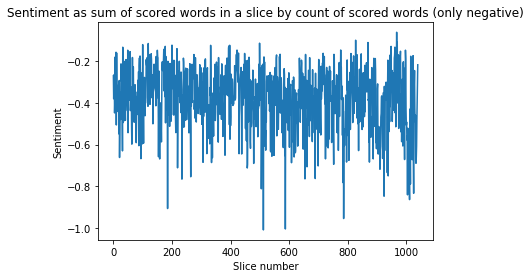

In [12]:
scores.plot()

In [77]:
MIN_NUMBER_OF_SENTENCES = 5000

In [78]:
long_books = {}

for book_description, book in books.items():
    book_summary_scores = book_analysis.BookAnalysis(book)
    book_summary_scores.score(scored_input_words_df)
    
    number_of_sentences = book_summary_scores.number_of_sentences
    print('author: {}, title: {}, number of sentences: {}'.format(book_summary_scores.book.author, book_summary_scores.book.title, book_summary_scores.number_of_sentences))
    
    if number_of_sentences >= MIN_NUMBER_OF_SENTENCES:
        long_books.update({book_description: book})

author: edwin_lester_linden_arnold, title: gulliver_of_mars, number of sentences: 2537


author: john_jacob_astor, title: a_journey_in_other_worlds_a_romance_of_the_future, number of sentences: 3510


author: robert_barr, title: the_face_and_the_mask, number of sentences: 4912


author: edward_bellamy, title: equality, number of sentences: 5552


author: edward_bellamy, title: looking_backward_2000_to_1887, number of sentences: 3224


author: pierre_benoit, title: atlantida, number of sentences: 5159


author: alexander_blade, title: the_brain, number of sentences: 3302


author: jesse_f_bone, title: the_lani_people, number of sentences: 4608


author: william_richard_bradshaw, title: the_goddess_of_atvatabar, number of sentences: 4734


author: edgar_rice_burroughs, title: a_princess_of_mars, number of sentences: 2369


author: edgar_rice_burroughs, title: the_gods_of_mars, number of sentences: 4099


author: edgar_rice_burroughs, title: warlord_of_mars, number of sentences: 2194


author: edgar_rice_burroughs, title: the_chessmen_of_mars, number of sentences: 4955


author: edgar_rice_burroughs, title: pellucidar, number of sentences: 2857


author: edgar_rice_burroughs, title: the_monster_men, number of sentences: 2651


author: john_w_campbell, title: the_black_star_passes, number of sentences: 4395


author: john_w_campbell, title: islands_of_space, number of sentences: 4409


author: john_w_campbell, title: invaders_from_the_infinite, number of sentences: 4177


author: robert_w_chambers, title: in_search_of_the_unknown, number of sentences: 4920


author: mark_clifton, title: eight_keys_to_eden, number of sentences: 3844


author: michael_d_cooper, title: the_runaway_asteroid, number of sentences: 4979


author: ray_cummings, title: brigands_of_the_moon, number of sentences: 7706


author: ray_cummings, title: the_fire_people, number of sentences: 4670


author: ray_cummings, title: the_girl_in_the_golden_atom, number of sentences: 6825


author: ray_cummings, title: tarrano_the_conqueror, number of sentences: 5667


author: samuel_r_delany, title: the_jewels_of_aptor, number of sentences: 4641


author: edson_mccann, title: preferred_risk, number of sentences: 4966


author: charles_willard_diffin, title: brood_of_the_dark_moon, number of sentences: 3808


author: charles_willard_diffin, title: two_thousand_miles_below, number of sentences: 3949


author: cory_doctorow, title: down_and_out_in_the_magic_kingdom, number of sentences: 3854


author: cory_doctorow, title: eastern_standard_tribe, number of sentences: 4475


author: cory_doctorow, title: someone_comes_to_town_someone_leaves_town, number of sentences: 8688


author: ellsworth_douglass, title: pharaohs_broker, number of sentences: 3738


author: arthur_conan_doyle, title: the_lost_world, number of sentences: 4459


author: e_everett_evans, title: alien_minds, number of sentences: 4086


author: e_everett_evans, title: man_of_many_minds, number of sentences: 4712


author: e_everett_evans, title: masters_of_space, number of sentences: 4716


author: e_everett_evans, title: the_planet_mappers, number of sentences: 4415


author: ralph_milne_farley, title: an_earthman_on_venus, number of sentences: 2360


author: ralph_milne_farley, title: the_radio_planet, number of sentences: 3841


author: philip_jose_farmer, title: the_green_odyssey, number of sentences: 4057


author: homer_eon_flint, title: the_blind_spot, number of sentences: 8492


author: homer_eon_flint, title: the_devolutionist_and_the_emancipatrix, number of sentences: 4771


author: jay_franklin, title: the_rat_race, number of sentences: 7176


author: h_b_fyfe, title: d_99_a_science_fiction_novel, number of sentences: 4688


author: raymond_z_gallun, title: the_planet_strappers, number of sentences: 5514


author: laurence_m_janifer, title: supermind, number of sentences: 7228


author: griffith, title: the_mummy_and_miss_nitocris_a_phantasy_of_the_fourth_dimension, number of sentences: 3645


author: griffith, title: the_angel_of_the_revolution_a_tale_of_the_coming_terror, number of sentences: 5338


author: raymond_f_jones, title: the_alien, number of sentences: 4196


author: william_hope_hodgson, title: the_night_land, number of sentences: 5026


author: robert_e_howard, title: the_hour_of_the_dragon, number of sentences: 4873


author: charles_john_cutcliffe_wright_hyne, title: the_lost_continent, number of sentences: 3886


author: milo_hastings, title: city_of_endless_night, number of sentences: 4390


author: christopher_leadem, title: the_mantooth, number of sentences: 6507


author: christopher_leadem, title: oberheim_(voices)_a_chronicle_of_war, number of sentences: 6869


author: murray_leinster, title: the_pirates_of_ersatz, number of sentences: 5337


author: david_lindsay, title: a_voyage_to_arcturus, number of sentences: 5809


author: frank_belknap_long, title: mars_is_my_destination, number of sentences: 3437


author: murray_leinster, title: operation_outer_space, number of sentences: 5187


author: andre_norton, title: star_born, number of sentences: 3711


author: andre_norton, title: storm_over_warlock, number of sentences: 3906


author: abraham_merritt, title: the_metal_monster, number of sentences: 5279


author: abraham_merritt, title: the_moon_pool, number of sentences: 6624


author: meyer_moldeven, title: the_universe_or_nothing, number of sentences: 5872


author: ward_moore, title: greener_than_you_think, number of sentences: 6637


author: edgar_pangborn, title: west_of_the_sun, number of sentences: 5653


author: h_beam_piper, title: the_cosmic_computer, number of sentences: 4771


author: h_beam_piper, title: space_viking, number of sentences: 4796


author: fletcher_pratt, title: the_blue_star, number of sentences: 4149


author: fletcher_pratt, title: the_onslaught_from_rigel, number of sentences: 4556


author: james_h_schmitz, title: legacy, number of sentences: 8186


author: garrett_putman_serviss, title: a_columbus_of_space, number of sentences: 3712


author: garrett_putman_serviss, title: edisons_conquest_of_mars, number of sentences: 3014


author: garrett_putman_serviss, title: the_second_deluge, number of sentences: 4389


author: robert_shea, title: the_saracen_land_of_the_infidel, number of sentences: 14316


author: robert_shea, title: the_saracen_the_holy_war, number of sentences: 11909


author: robert_shea, title: shaman, number of sentences: 15391


author: e_e_smith, title: the_galaxy_primes, number of sentences: 6147


author: e_e_smith, title: spacehounds_of_ipc, number of sentences: 4688


author: e_e_smith, title: the_skylark_of_space, number of sentences: 5158


author: e_e_smith, title: skylark_three, number of sentences: 4860


author: e_e_smith, title: triplanetary, number of sentences: 5992


author: e_e_smith, title: first_lensman, number of sentences: 7399


author: george_o_smith, title: the_fourth_r, number of sentences: 4525


author: george_o_smith, title: highways_in_hiding, number of sentences: 5779


author: van_tassel_sutphen, title: the_doomsman, number of sentences: 4242


author: jules_verne, title: a_journey_to_the_centre_of_the_earth, number of sentences: 5360


author: jules_verne, title: from_the_earth_to_the_moon_and_round_the_moon, number of sentences: 5382


author: jules_verne, title: a_journey_into_the_interior_of_the_earth, number of sentences: 5074


author: jules_verne, title: the_moon_voyage, number of sentences: 6597


author: jules_verne, title: the_mysterious_island, number of sentences: 8645


author: jules_verne, title: off_on_a_comet_a_journey_through_planetary_space, number of sentences: 3744


author: jules_verne, title: twenty_thousand_leagues_under_the_sea, number of sentences: 6587


author: h_g_wells, title: the_first_men_in_the_moon, number of sentences: 4409


author: h_g_wells, title: the_food_of_the_gods_and_how_it_came_to_earth, number of sentences: 4866


author: h_g_wells, title: tales_of_space_and_time, number of sentences: 4384


author: h_g_wells, title: twelve_stories_and_a_dream, number of sentences: 4043


author: h_g_wells, title: when_the_sleeper_wakes, number of sentences: 5353


author: h_g_wells, title: the_sleeper_awakes, number of sentences: 5961


author: h_g_wells, title: the_world_set_free, number of sentences: 2765


author: h_g_wells, title: the_country_of_the_blind_and_other_stories, number of sentences: 10110


author: philip_wylie, title: gladiator, number of sentences: 7829


ZeroDivisionError: division by zero

In [55]:
for description, long_book in long_books.items():
    print(description)

james_branch_cabell_gallantry_dizain_des_fetes_galantes
james_branch_cabell_jurgen_a_comedy_of_justice
gordon_bottomley_the_atlantic_book_of_modern_plays
william_hope_hodgson_the_night_land
sir_thomas_malory_le_morte_d_arthur_volume_1
sir_thomas_malory_le_morte_d_arthur_volume_2
william_morris_the_well_at_the_worlds_end_a_tale


In [56]:
results_path = '{}/outputs_26_10'.format(project_path)

In [57]:
#for step in range(0, 4):
#    for book in books.values():
#        scores = distance_analysis.DistanceToWordWithModuloSentimentHigherThan(book, step)
#        books_scores = scores.score(SLICE_SIZE, scored_input_words_df)
#        scores.store_to_file(results_path)
    

In [58]:
analysis = [
            #slice_analysis.SumScoredByScoredCountOnlyPositiveAnalysis, 
            #slice_analysis.SumScoredByAllCountOnlyPositiveAnalysis, 
            #slice_analysis.SumScoredOnlyPositiveAnalysis,
            #slice_analysis.SumScoredByScoredCountOnlyNegativeAnalysis, 
            #slice_analysis.SumScoredByAllCountOnlyNegativeAnalysis, 
            #slice_analysis.SumScoredOnlyNegativeAnalysis,
            #sentence_analysis.SumScoredByScoredCountOnlyPositivePerSentenceAnalysis,
            #sentence_analysis.SumScoredByAllCountOnlyPositivePerSentenceAnalysis,
            #sentence_analysis.SumScoredOnlyPositivePerSentenceAnalysis,
            #sentence_analysis.SumScoredByScoredCountOnlyNegativePerSentenceAnalysis,
            #sentence_analysis.SumScoredByAllCountOnlyNegativePerSentenceAnalysis,
            #sentence_analysis.SumScoredOnlyNegativePerSentenceAnalysis,
            sentence_analysis.NumberOfWordsWithSentimentPerSentenceAnalysis,
            sentence_analysis.NumberOfWordsPerSentenceAnalysis,
            #slice_analysis.SumScoredByScoredCountAnalysis,
            #slice_analysis.SumScoredByAllCountAnalysis,
            #slice_analysis.SumScoredAnalysis,
            sentence_analysis.SumScoredByScoredCountPerSentenceAnalysis,
            sentence_analysis.SumScoredByAllCountPerSentenceAnalysis,
            sentence_analysis.SumScoredPerSentenceAnalysis
            ]

In [59]:
for long_book in long_books.values():
    for task in analysis:
        scores = task(long_book)
        books_scores = scores.score(SLICE_SIZE, scored_input_words_df)
        scores.store_to_file(results_path, with_header=True, with_slice_number=False)
        #scores.plot()
        

In [62]:
for long_book in long_books.values():
    book_summary_scores = book_analysis.BookAnalysis(long_book)
    book_summary_scores.score(scored_input_words_df)
    #book_summary_scores.print()
    book_summary_scores.store_to_file(results_path, with_header=True)